### Aluno: Paulo Marcelo Ribeiro Soeiro da Silva
### Matriculo: 20190040030

In [3]:
pip install linearregression

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Bibliotecas utilizadas 
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from numpy import linalg as LA
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

## Leitura de Arquivos

In [5]:
# Arquivos dados de treinamento
train_data = pd.read_csv('train.csv', delimiter=';')

# Arquivo dados de testes
test_data = pd.read_csv('test.csv', delimiter=';')

## Visualização dos Datasets

In [6]:
train_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2181,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2182,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2183,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2184,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_data.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [8]:
test_data.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

## Funções de Calculo da intesidade e Simetria das amostras no DatasSets

In [9]:
def calcular_intensidade(pixels):
    return sum(pixels) / 255

In [10]:
def calcular_simetria(pixels):
    # Atribuindo os valores dos numeros de linhas e colunas
    num_linhas, num_colunas = 28, 28
    
    #Valor dos eixos vertical e horizontal
    eixo_vert = num_colunas // 2
    eixo_hori = num_linhas // 2
    
    simetria_vertical = 0
    simetria_horizontal = 0
    
    #calculo da simetria_vertical
    for i in range(num_linhas):
        for j in range(eixo_vert):
            pixel_esquerda = pixels[i * num_colunas + j]
            pixel_direita = pixels[i * num_colunas + (num_colunas - 1 - j)]
            simetria_vertical += abs(pixel_esquerda - pixel_direita)

    #calculo da simetria_Horizontal       
    for i in range(eixo_hori):
        for j in range(num_colunas):
            pixel_superior = pixels[i * num_colunas + j]
            pixel_inferior = pixels[(num_linhas - 1 - i) * num_colunas + j]
            simetria_horizontal += abs(pixel_superior - pixel_inferior)
    
    
    simetria_vertical /= 255
    simetria_horizontal /= 255
    simetria = simetria_vertical + simetria_horizontal
    
    return simetria

## Construção dos Novos Arquivos de Treino e Testes

In [11]:
train_redu = pd.DataFrame()
train_redu['label'] = train_data['label']
train_redu['intensidade'] = train_data.apply(lambda row: calcular_intensidade(row[1:]), axis=1)
train_redu['simetria'] = train_data.apply(lambda row: calcular_simetria(row[1:]), axis=1)

In [12]:
test_redu = pd.DataFrame()
test_redu['label'] = test_data['label']
test_redu['intensidade'] = test_data.apply(lambda row: calcular_intensidade(row[1:]), axis=1)
test_redu['simetria'] = test_data.apply(lambda row: calcular_simetria(row[1:]), axis=1)

In [13]:
train_redu

,label,intensidade,simetria
0,0,145.435294,148.572549
1,0,118.576471,137.113725
2,0,127.600000,134.047059
3,0,138.047059,151.003922
4,0,146.215686,122.501961
...,...,...,...
2181,5,105.686275,133.890196
2182,5,113.050980,116.698039
2183,5,110.725490,133.019608
2184,5,99.305882,132.133333


In [14]:
test_redu

,label,intensidade,simetria
0,0,147.933333,130.470588
1,0,131.054902,122.721569
2,0,134.890196,151.725490
3,0,139.976471,133.921569
4,0,129.580392,130.274510
...,...,...,...
1110,5,96.121569,139.521569
1111,5,98.439216,130.729412
1112,5,95.141176,122.227451
1113,5,106.882353,128.007843


In [15]:
train_redu.to_csv('train_redu.csv', index=False)
test_redu.to_csv('test_redu.csv', index=False)

In [16]:
print("Amostras do conjunto de treinamento:")
print(train_redu.head())

print("\nAmostras do conjunto de teste:")
print(test_redu.head())

Amostras do conjunto de treinamento:
   label  intensidade    simetria
0      0   145.435294  148.572549
1      0   118.576471  137.113725
2      0   127.600000  134.047059
3      0   138.047059  151.003922
4      0   146.215686  122.501961

Amostras do conjunto de teste:
   label  intensidade    simetria
0      0   147.933333  130.470588
1      0   131.054902  122.721569
2      0   134.890196  151.725490
3      0   139.976471  133.921569
4      0   129.580392  130.274510


#### Filtragem dos dados de train_Redu e Test_Redu + Plotagem dos dados train1X5

In [17]:
train1x5 = train_redu[(train_redu['label'] == 1) | (train_redu['label'] == 5)].copy()

In [18]:
test1x5 = test_redu[(test_redu['label'] == 1) | (test_redu['label'] == 5)].copy()

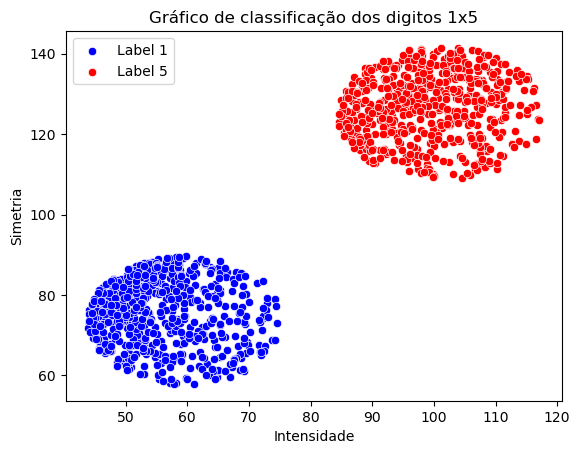

In [19]:
# Plotagem do grafico do 1x5
data_label_1 = train1x5[train1x5['label'] == 1]
data_label_5 = train1x5[train1x5['label'] == 5]

sns.scatterplot(data=data_label_1, x='intensidade', y='simetria', color='blue', label='Label 1')
sns.scatterplot(data=data_label_5, x='intensidade', y='simetria', color='red', label='Label 5')

plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.title('Gráfico de classificação dos digitos 1x5')

plt.legend()
plt.show()

## Funções e Classes dos Classificadores:  
- Perceptron(PLA)
- Regressão Linear 
- Regressão Logística
- constroi_Lista_PCI
- Prever Digitos


### Divisão dos Dados Para Treinamento

In [20]:
# Tranformando o x em tupla para que o PLA rode
X = train1x5[['intensidade', 'simetria']].values
y = train1x5['label'].apply(lambda x: 1 if x == 1 else -1).values
X_Tupla = list(zip(X,y))
X_train = X_Tupla[:2100]

In [64]:
X_test_1x5 = test1x5[['intensidade', 'simetria']].values
y_test_1x5 = test1x5['label'].values

In [66]:
y_test_1x5

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5,

### Algoritmo_PLA

In [22]:
def algoritmo_PLA(X):
    W = np.zeros(len(X[0]) + 1)
    listaPCI = X
    while len(listaPCI) > 0:
        x = random.choice(listaPCI)
        x_ = x[0]  # Recupera apenas os pontos de x
        y = x[-1]  # Recupera a classificação
        x_ = np.insert(x_, 0, 1)
        
        W = W + y * x_
        
        listaPCI = constroi_Lista_PCI(X, W)
    
    return W

In [23]:
def constroi_Lista_PCI(X, W):
    pontos_incorretos = []
    for x in X:
        x_ = x[0]
        y = x[-1]  
        x_ = np.insert(x_, 0, 1)

        predicao = sum(W[i] * x_[i] for i in range(len(W)))

        if predicao * y <= 0:
            pontos_incorretos.append(x)

    return pontos_incorretos

In [24]:
def prever_digitos(W, X):
    predicoes = []
    
    for x in X:
        x_ = np.insert(x, 0, 1)
        predicao = np.sign(np.dot(W, x_)) #se a precisão for positiva 1 se não 0 e -1 negativa
         
        if predicao == 1:
            predicoes.append(1)
            
        elif predicao == -1:
            predicoes.append(5)
    
    return np.array(predicoes)

### Classe para Regressão Linear

In [25]:
class LinearRegression:
    def execute(self, _X, _y):
        X =  np.array(_X)
        y =  np.array(_y)
        W = np.column_stack([np.ones(X.shape[0]),X])
        xTx = np.dot(W.transpose(), W)
        inverse = np.linalg.inv(xTx)
        self.w = np.dot(np.dot(inverse, W.transpose()), y)
    
    def prever_digitos(self, _x):
        X = np.array(_x)
        W = np.column_stack([np.ones(X.shape[0]),X])
        prediction = np.sign(np.dot(W, self.w))
        predictions = []
        for i in prediction:
            if i == 1:
                predictions.append(1)
            else:
                predictions.append(5)
        return predictions
    def get_w(self):
        return self.w

In [120]:
class LinearRegression_Completo:
    def execute(self, _X, _y):
        X =  np.array(_X)
        y =  np.array(_y)
        W = np.column_stack([np.ones(X.shape[0]),X])
        xTx = np.dot(W.transpose(), W)
        inverse = np.linalg.inv(xTx)
        self.w = np.dot(np.dot(inverse, W.transpose()), y)
    
    def prever_digitos(self, _x):
        X = np.array(_x)
        W = np.column_stack([np.ones(X.shape[0]),X])
        prediction = np.sign(np.dot(W, self.w))
        return prediction
    
    def get_w(self):
        return self.w


### Classe para Regressão Logistica

In [58]:
class LogisticRegression:
    def __init__(self, eta=0.5, tmax=100000, batch_size=64):
        self.eta = eta
        self.tmax = tmax
        self.batch_size = batch_size
        
    def fit(self, _X, _y):
        X = np.concatenate((np.ones((len(_X),1)), _X), axis=1)
        y = np.array(_y)
        
        N = X.shape[0]
        d = X.shape[1]
        
        w = np.zeros(d, dtype=float) #armazenar os coeficientes de regressão logistica
        self.w = []
        

        for i in range(self.tmax):
            vsoma = np.zeros(d, dtype=float)

            if self.batch_size < N:
                indices = random.sample(range(N),self.batch_size)
                batchX = [X[index] for index in indices]
                batchY = [y[index] for index in indices]
            else:
                batchX = X
                batchY = y

            for xn, yn in zip(batchX, batchY):
                vsoma += (yn * xn) / (1 + np.exp((yn * w).T @ xn))
            
            gt = vsoma/self.batch_size
            if LA.norm(gt) < 0.0001 :
                break
            w = w + (self.eta*gt)

        self.w = w
        
    def predict_prob(self, X):
        return [(1 / (1 + np.exp(-(self.w[0] + self.w[1:].T @ x)))) for x in X]

    def prever_digitos(self, X):
        return [1 if (1 / (1 + np.exp(-(self.w[0] + self.w[1:].T @ x)))) >= 0.5 
                else -1 for x in X]

    def get_W(self):
        return self.w

    def getRegressionY(self, regressionX, shift=0):
        return (-self.w[0]+shift - self.w[1]*regressionX) / self.w[2]

## Teste de a acurácia do meu modelo Perceptron (PLA) e Plotagem do Grafico

In [27]:
# Chamando as funções par ao treinamento do PLA
PLA = algoritmo_PLA(X_train)
Prever_PLA = prever_digitos(PLA, X_test_1x5)

In [28]:
VP = 0
VN = 0
FP = 0
FN = 0

for i in range(len(y_test_1x5)):
    if Prever_PLA[i] == 1 and y_test_1x5[i] == 1:
        VP += 1 
    elif Prever_PLA[i] == 5 and y_test_1x5[i] == 5:
        VN += 1 
    elif Prever_PLA[i] == 1 and y_test_1x5[i] == 5:
        FP += 1 
    elif Prever_PLA[i] == 5 and y_test_1x5[i] == 1:
        FN += 1  

print("Confusion Matrix:")
print("Positivo (VP):", VP)
print("Negativo (VN):", VN)
print("Falso Positivo (FP):", FP)
print("Falso Negativo (FN):", FN)
print("====================================================")

conf_matrix = confusion_matrix(y_test_1x5, Prever_PLA)
print("Confusion Matrix:")
print(conf_matrix)
print("====================================================")

accuracy = (VP + VN) / len(y_test_1x5)
precision = VP / (VP + FP)
recall = VP / (VP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Accuracy (PLA):", accuracy)
print("Precision (PLA):", precision)
print("Recall (PLA):", recall)
print("F1 Score (PLA):", f1_score)
print("====================================================")

report = classification_report(y_test_1x5, Prever_PLA)
print("Classification Report (PLA):")
print(report)

Confusion Matrix:
Positivo (VP): 292
Negativo (VN): 291
Falso Positivo (FP): 0
Falso Negativo (FN): 0
Confusion Matrix:
[[292   0]
 [  0 291]]
Accuracy (PLA): 1.0
Precision (PLA): 1.0
Recall (PLA): 1.0
F1 Score (PLA): 1.0
Classification Report (PLA):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       292
           5       1.00      1.00      1.00       291

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583



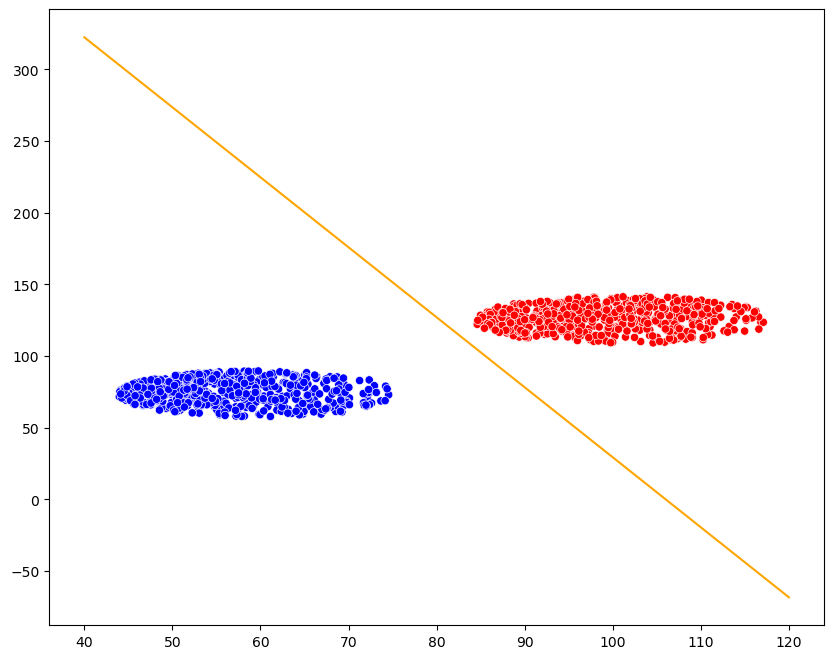

In [29]:
w_PLA = PLA
cor = ['blue' if digito == 1 else 'red' for digito in y]
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X[:, 0], y=X[:, 1], c=cor)
x = np.linspace(40, 120, 50)
plt.plot(x, (-w_PLA[0] - w_PLA[1] * x) / w_PLA[2], color="orange")

# Redefinir zoom
plt.xlim(auto=True)
plt.ylim(auto=True)

plt.show()


## Teste de a acurácia do meu modelo Regressão Linear e sua previsão de digitos

In [30]:
regressao = LinearRegression()
regressao.execute(X, y)
Prever_Regressao = regressao.prever_digitos(X_test_1x5)

In [63]:
X_test_1x5

array([[ 51.63921569,  71.44313725],
       [ 51.6745098 ,  85.05098039],
       [ 44.84705882,  72.6745098 ],
       ...,
       [ 95.14117647, 122.22745098],
       [106.88235294, 128.00784314],
       [117.63921569, 123.38039216]])

In [31]:
VP = 0
VN = 0
FP = 0
FN = 0

for i in range(len(y_test_1x5)):
    if Prever_Regressao[i] == 1 and y_test_1x5[i] == 1:
        VP += 1 
    elif Prever_Regressao[i] == 5 and y_test_1x5[i] == 5:
        VN += 1 
    elif Prever_Regressao[i] == 1 and y_test_1x5[i] == 5 :
        FP += 1 
    elif Prever_Regressao[i] == 5 and y_test_1x5[i] == 1:
        FN += 1  

print("Confusion Matrix:")
print("Positivo (VP):", VP)
print("Negativo (VN):", VN)
print("Falso Positivo (FP):", FP)
print("Falso Negativo (FN):", FN)
print("====================================================")

conf_matrix = confusion_matrix(y_test_1x5, Prever_Regressao)
print("Confusion Matrix:")
print(conf_matrix)
print("====================================================")

accuracy = (VP + VN) / len(y_test_1x5)
precision = VP / (VP + FP)
recall = VP / (VP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Accuracy (Regressão_Linear):", accuracy)
print("Precision (Regressão_Linear):", precision)
print("Recall (Regressão_Linear):", recall)
print("F1 Score (Regressão_Linear):", f1_score)
print("====================================================")

report = classification_report(y_test_1x5, Prever_Regressao)
print("Classification Report (Regressão_Linear):")
print(report)

Confusion Matrix:
Positivo (VP): 292
Negativo (VN): 291
Falso Positivo (FP): 0
Falso Negativo (FN): 0
Confusion Matrix:
[[292   0]
 [  0 291]]
Accuracy (Regressão_Linear): 1.0
Precision (Regressão_Linear): 1.0
Recall (Regressão_Linear): 1.0
F1 Score (Regressão_Linear): 1.0
Classification Report (Regressão_Linear):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       292
           5       1.00      1.00      1.00       291

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583



### Plotagem do Grafico Regressão Linear

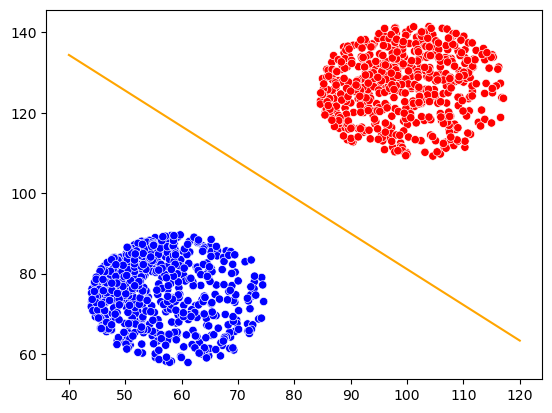

In [32]:
w_RL = regressao.get_w()
cor = [ 'blue' if digito == 1 else 'red' for digito in y]
sns.scatterplot(x=X[:, 0], y=X[:, 1], c=cor)
plt.plot(x, (-w_RL[0] - w_RL[1]*x)/w_RL[2], color = "orange")
plt.show()

## Teste de a acurácia do meu modelo Regressão Logistica e sua previsão de digitos

In [60]:
logistc = LogisticRegression()
logistc.fit(X,y)
logistc_predict = logistc.prever_digitos(X_test_1x5)

C:\Users\paulo\AppData\Local\Temp\ipykernel_22960\3882085776.py:30: RuntimeWarning: overflow encountered in exp
  vsoma += (yn * xn) / (1 + np.exp((yn * w).T @ xn))


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

C:\Users\paulo\AppData\Local\Temp\ipykernel_22960\3882085776.py:43: RuntimeWarning: overflow encountered in exp
  print([1 if (1 / (1 + np.exp(-(self.w[0] + self.w[1:].T @ x)))) >= 0.5
C:\Users\paulo\AppData\Local\Temp\ipykernel_22960\3882085776.py:45: RuntimeWarning: overflow encountered in exp
  return [1 if (1 / (1 + np.exp(-(self.w[0] + self.w[1:].T @ x)))) >= 0.5


In [101]:
len(logistc_predict)

583

In [34]:
VP = 0
VN = 0
FP = 0
FN = 0

for i in range(len(y_test_1x5)):
    if logistc_predict[i] == 1 and y_test_1x5[i] == 1:
        VP += 1 
    elif logistc_predict[i] == 5 and y_test_1x5[i] == 5:
        VN += 1 
    elif logistc_predict[i] == 1 and y_test_1x5[i] == 5:
        FP += 1 
    elif logistc_predict[i] == 5 and y_test_1x5[i] == 1:
        FN += 1  

print("Confusion Matrix:")
print("Positivo (VP):", VP)
print("Negativo (VN):", VN)
print("Falso Positivo (FP):", FP)
print("Falso Negativo (FN):", FN)
print("====================================================")

conf_matrix = confusion_matrix(y_test_1x5, logistc_predict)
print("Confusion Matrix:")
print(conf_matrix)
print("====================================================")

try: 
    accuracy = (VP + VN) / len(y_test_1x5)
except:
    accuracy = 0
    precision = VP / (VP + FP)
    recall = VP / (VP + FN)
    f1_score = 2 * (precision * recall) / (precision + recall)

print("Accuracy (Regressão Logistica):", accuracy)
print("Precision (Regressão Logistica):", precision)
print("Recall (Regressão Logistica):", recall)
print("F1 Score (Regressão Logistica):", f1_score)
print("====================================================")

report = classification_report(y_test_1x5, logistc_predict)
print("Classification Report (Regressão Logistica):")
print(report)

Confusion Matrix:
Positivo (VP): 290
Negativo (VN): 280
Falso Positivo (FP): 11
Falso Negativo (FN): 2
Confusion Matrix:
[[290   2]
 [ 11 280]]
Accuracy (Regressão Logistica): 0.9777015437392796
Precision (Regressão Logistica): 1.0
Recall (Regressão Logistica): 1.0
F1 Score (Regressão Logistica): 1.0
Classification Report (Regressão Logistica):
              precision    recall  f1-score   support

           1       0.96      0.99      0.98       292
           5       0.99      0.96      0.98       291

    accuracy                           0.98       583
   macro avg       0.98      0.98      0.98       583
weighted avg       0.98      0.98      0.98       583



### Plotagem do Grafico Regressão Logistica

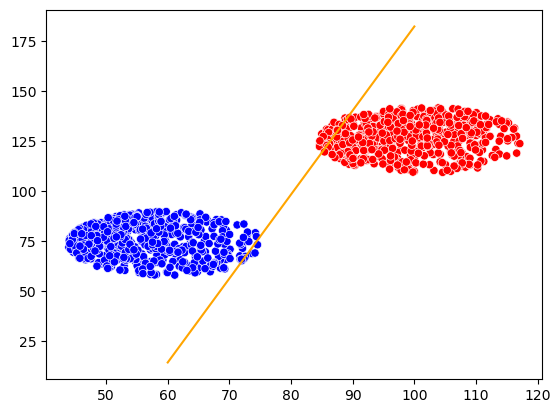

In [35]:
# Plotagem do grafico de regressão logistica
w_logistc = logistc.get_W()
cor = [ 'blue' if digito == 1 else 'red' for digito in y]
sns.scatterplot(x=X[:, 0], y=X[:, 1], c=cor)
x = np.linspace(60,100,50)
plt.plot(x, (-w_logistc[0] - w_logistc[1]*x)/w_logistc[2], color = "orange")
plt.show()

## Classificador de dígitos completo

In [67]:
train_redu

,label,intensidade,simetria
0,0,145.435294,148.572549
1,0,118.576471,137.113725
2,0,127.600000,134.047059
3,0,138.047059,151.003922
4,0,146.215686,122.501961
...,...,...,...
2181,5,105.686275,133.890196
2182,5,113.050980,116.698039
2183,5,110.725490,133.019608
2184,5,99.305882,132.133333


In [68]:
test_redu

,label,intensidade,simetria
0,0,147.933333,130.470588
1,0,131.054902,122.721569
2,0,134.890196,151.725490
3,0,139.976471,133.921569
4,0,129.580392,130.274510
...,...,...,...
1110,5,96.121569,139.521569
1111,5,98.439216,130.729412
1112,5,95.141176,122.227451
1113,5,106.882353,128.007843


In [36]:
X_Train = train_redu[['intensidade', 'simetria']].values
y_Train = train_redu['label'].values

In [37]:
X_Test = test_redu[['intensidade', 'simetria']].values
y_Test = test_redu['label'].values

In [80]:
# Classificador de 0 comparo ao resto dos digitos
comp_0_all_x = train_redu[['intensidade', 'simetria']].values
comp_0_all_y = train_redu['label'].apply(lambda x: 1 if x == 0 else -1).values

In [81]:
# Classificador de 1 comparo ao resto dos digitos
comp_1_all_x = train_redu[['intensidade', 'simetria']].values
comp_1_all_y = train_redu['label'].apply(lambda x: 1 if x == 1 else -1).values

In [82]:
# Classificador de 4 comparado ao resto dos digitos
comp_4_all_x = train_redu[['intensidade', 'simetria']].values
comp_4_all_y = train_redu['label'].apply(lambda x: 1 if x == 4 else -1).values

In [83]:
# Classificador de 5 comparado ao resto dos digitos
comp_5_all_x = train_redu[['intensidade', 'simetria']].values
comp_5_all_y = train_redu['label'].apply(lambda x: 1 if x == 5 else -1).values

## Predição do Classificador Regressão Linear para os dados Completos

In [126]:
classifier_0 = LinearRegression_Completo()
classifier_0.execute(comp_0_all_x, comp_0_all_y)
w_0 = classifier_0.get_w()

classifier_1 = LinearRegression_Completo()
classifier_1.execute(comp_1_all_x, comp_1_all_y)
w_1 = classifier_1.get_w()

classifier_4 = LinearRegression_Completo()
classifier_4.execute(comp_4_all_x, comp_4_all_y)
w_4 = classifier_4.get_w()

classifier_5 = LinearRegression_Completo()
classifier_5.execute(comp_5_all_x, comp_5_all_y)
w_5 = classifier_5.get_w()

In [89]:
print(w_0,w_1,w_4,w_5)

[-2.23739689  0.0254455  -0.0066963 ] [ 2.6042966  -0.01193896 -0.01779691] [ 0.02305873  0.01298327 -0.01555772] [-2.38995844 -0.02648981  0.04005094]


In [133]:
predictions_RL = []
for x in X_Test:
        pred_0 = classifier_0.prever_digitos([x])
        print(x)
        if pred_0 == 1:
            predictions_RL.append(0)
        else:
            pred_1 = classifier_1.prever_digitos([x])
            if pred_1 == 1:
                predictions_RL.append(1)
            else:
                pred_4 = classifier_4.prever_digitos([x])
                if pred_4 == 1:
                    predictions_RL.append(4)

                else:
                    predictions_RL.append(5)

[147.93333333 130.47058824]
[131.05490196 122.72156863]
[134.89019608 151.7254902 ]
[139.97647059 133.92156863]
[129.58039216 130.2745098 ]
[115.07058824 141.85098039]
[117.21176471 128.80784314]
[144.79215686 153.38039216]
[152.40784314 150.21960784]
[131.07058824 140.21960784]
[145.66666667 155.27058824]
[121.50588235 136.84705882]
[124.17647059 118.0627451 ]
[113.61176471 142.25098039]
[148.06666667 149.01960784]
[132.19607843 141.6       ]
[142.87058824 115.78823529]
[132.25098039 137.17647059]
[158.30196078 142.31372549]
[143.55294118 139.49803922]
[148.80392157 149.71764706]
[130.4745098  156.02352941]
[136.43921569 125.18431373]
[141.98823529 127.97647059]
[131.43137255 142.89411765]
[116.84705882 151.41176471]
[122.2627451  127.85098039]
[135.30588235 136.70588235]
[136.23137255 148.09411765]
[141.2627451  130.66666667]
[112.72941176 135.40392157]
[131.90980392 153.49803922]
[151.57647059 139.22352941]
[142.35686275 130.43921569]
[135.45490196 148.21176471]
[117.50980392 146.01

In [128]:
len(predictions_RL)

1115

In [129]:
len(X_Test)

1115

In [132]:
report = classification_report(y_Test, predictions_RL)
print("Classification Report (Multiclass):")
print(report)

Classification Report (Multiclass):
              precision    recall  f1-score   support

           0       1.00      0.80      0.89       218
           1       1.00      1.00      1.00       292
           4       0.00      0.00      0.00       314
           5       0.45      1.00      0.62       291

    accuracy                           0.68      1115
   macro avg       0.61      0.70      0.63      1115
weighted avg       0.57      0.68      0.60      1115



c:\Users\paulo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\paulo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\paulo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Predição do Classificador Regressão Logístico para os dados Completos

In [46]:
predictions_Logistic = []

In [47]:
classifier_0 = LogisticRegression()
classifier_0.fit(X_Train_in_si_0, y_Train_label_0)
predictions_Logistic.append(classifier_0)

C:\Users\paulo\AppData\Local\Temp\ipykernel_22960\3426300553.py:29: RuntimeWarning: overflow encountered in exp
  vsoma += (yn * xn) / (1 + np.exp((yn * w).T @ xn))


In [48]:
classifier_1 = LogisticRegression()
classifier_1.fit(X_Train_in_si_1, y_Train_label_1)
predictions_Logistic.append(classifier_1)

C:\Users\paulo\AppData\Local\Temp\ipykernel_22960\3426300553.py:29: RuntimeWarning: overflow encountered in exp
  vsoma += (yn * xn) / (1 + np.exp((yn * w).T @ xn))


In [49]:
classifier_4 = LogisticRegression()
classifier_4.fit(X_Train_in_si_4, y_Train_label_4)
predictions_Logistic.append(classifier_4)

C:\Users\paulo\AppData\Local\Temp\ipykernel_22960\3426300553.py:29: RuntimeWarning: overflow encountered in exp
  vsoma += (yn * xn) / (1 + np.exp((yn * w).T @ xn))


In [50]:
y_pred_0 = classifier_0.prever_digitos(X_Test)
y_pred_1 = classifier_1.prever_digitos(X_Test)
y_pred_4 = classifier_4.prever_digitos(X_Test)

C:\Users\paulo\AppData\Local\Temp\ipykernel_22960\3426300553.py:42: RuntimeWarning: overflow encountered in exp
  return [1 if (1 / (1 + np.exp(-(self.w[0] + self.w[1:].T @ x)))) >= 0.5


In [51]:
def Classificacao_Logistic(x):
    result_0 = classifier_0.prever_digitos([x])[0]
    if result_0 == 1:
        return 0
    result_1 = classifier_1.prever_digitos([x])[0]
    if result_1 == 1:
        return 1
    result_4 = classifier_4.prever_digitos([x])[0]
    if result_4 == 1:
        return 4
    return 5

predictions_Logistic = [Classificacao_Logistic(x) for x in X_Test]

report = classification_report(y_Test, predictions_Logistic)
print("Classification Report (Multiclass):")
print(report)

Classification Report (Multiclass):
              precision    recall  f1-score   support

           0       0.85      0.40      0.55       218
           1       0.94      0.85      0.89       292
           4       0.54      0.33      0.41       314
           5       0.48      0.90      0.62       291

    accuracy                           0.63      1115
   macro avg       0.70      0.62      0.62      1115
weighted avg       0.69      0.63      0.62      1115



C:\Users\paulo\AppData\Local\Temp\ipykernel_22960\3426300553.py:42: RuntimeWarning: overflow encountered in exp
  return [1 if (1 / (1 + np.exp(-(self.w[0] + self.w[1:].T @ x)))) >= 0.5


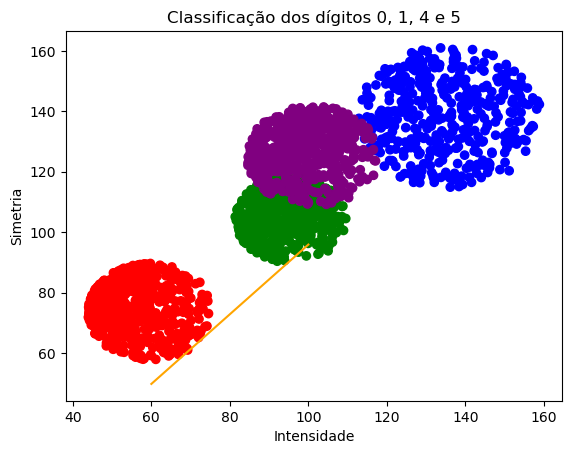

In [52]:
w_logistic = classifier_0.get_W()

cor = ['blue' if digito == 0 else 'red' if digito == 1 else 'green' if digito == 4 else 'purple' for digito in y_Train]
plt.scatter(X_Train[:, 0], X_Train[:, 1], c=cor)

x = np.linspace(60, 100, 50)
plt.plot(x, (-w_logistic[0] - w_logistic[1] * x) / w_logistic[2], color="orange")

plt.title("Classificação dos dígitos 0, 1, 4 e 5")
plt.xlabel("Intensidade")
plt.ylabel("Simetria")

plt.show()